In [ ]:
# Pranav Narala, Rishyendra Medamanuri, Sripad Ganti
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Test Example

In [ ]:
win_matrix = [[0, 1, 0, 0, 0, 0],
              [0, 0, 1, 0, 1, 0],
              [1, 0, 0, 0, 0, 0],
              [0, 0, 1, 0, 1, 0],
              [0, 0, 0, 0, 0, 1],
              [1, 0, 0, 1, 0, 0]]

In [ ]:
np.sum(win_matrix, axis=0)[1]

1

In [ ]:
T = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
h = 0.01

In [ ]:
def compute_partial(t):
  partial = 0
  for i in range(6):
    if i != t:
      partial += (T[i] / (T[i] + T[t])) * (win_matrix[t][i] / T[t] - win_matrix[i][t] / T[i])

  return partial

In [ ]:
for iterations in range(100):
  for i in range(6):
    partial = compute_partial(i)
    new_t = (T[i] + h * partial) / sum(T)
    T[i] = new_t

In [ ]:
print(T)

[0.07235420179546255, 0.17211594650626835, 0.07235421444213753, 0.282259714157792, 0.11865645615299598, 0.2822594734726671]


In [ ]:
# Markov Chain

import numpy as np

probability_distribution = np.array([[1/3, 1/3, 0, 0, 0, 0], [0, 2/3, 1/3, 0, 1/3, 0], [1/3, 0, 1/3, 0, 0, 0], [0, 0, 1/3, 2/3, 1/3, 0], [0, 0, 0, 0, 1/3, 1/3], [1/3, 0, 0, 1/3, 0, 2/3]])
probability_distribution

array([[0.33333333, 0.33333333, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.66666667, 0.33333333, 0.        , 0.33333333,
        0.        ],
       [0.33333333, 0.        , 0.33333333, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.33333333, 0.66666667, 0.33333333,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.33333333,
        0.33333333],
       [0.33333333, 0.        , 0.        , 0.33333333, 0.        ,
        0.66666667]])

In [ ]:
p_values = np.array([1000, 1000, 1000, 1000, 1000, 1000])

for x in range(100):
  p_values = np.matmul(probability_distribution, p_values)

In [ ]:
p_values / sum(p_values)

array([0.1 , 0.2 , 0.05, 0.2 , 0.15, 0.3 ])

# **Maximum Likelihood IPL Rankings**

In [ ]:
# Applying to IPL Data
# Using Maximum Likelihood Method

import pandas as pd
import numpy as np

In [ ]:
ipl_data = pd.read_csv('/content/drive/MyDrive/SportsRankingsData/IPL_Matches_2022.csv')
ipl_data.head(10)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
5,1304115,Mumbai,2022-05-21,2022,69,Delhi Capitals,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Mumbai Indians,Wickets,5,NaN,JJ Bumrah,"['PP Shaw', 'DA Warner', 'MR Marsh', 'RR Pant'...","['Ishan Kishan', 'RG Sharma', 'D Brevis', 'Til...",Nitin Menon,Tapan Sharma
6,1304114,Mumbai,2022-05-20,2022,68,Chennai Super Kings,Rajasthan Royals,"Brabourne Stadium, Mumbai",Chennai Super Kings,bat,N,Rajasthan Royals,Wickets,5,NaN,R Ashwin,"['RD Gaikwad', 'DP Conway', 'MM Ali', 'N Jagad...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,NA Patwardhan
7,1304113,Mumbai,2022-05-19,2022,67,Gujarat Titans,Royal Challengers Bangalore,"Wankhede Stadium, Mumbai",Gujarat Titans,bat,N,Royal Challengers Bangalore,Wickets,8,NaN,V Kohli,"['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...","['V Kohli', 'F du Plessis', 'GJ Maxwell', 'KD ...",KN Ananthapadmanabhan,GR Sadashiv Iyer
8,1304112,Navi Mumbai,2022-05-18,2022,66,Lucknow Super Giants,Kolkata Knight Riders,"Dr DY Patil Sports Academy, Mumbai",Lucknow Super Giants,bat,N,Lucknow Super Giants,Runs,2,NaN,Q de Kock,"['Q de Kock', 'KL Rahul', 'E Lewis', 'DJ Hooda...","['VR Iyer', 'A Tomar', 'N Rana', 'SS Iyer', 'S...",R Pandit,YC Barde
9,1304111,Mumbai,2022-05-17,2022,65,Sunrisers Hyderabad,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Sunrisers Hyderabad,Runs,3,NaN,RA Tripathi,"['Abhishek Sharma', 'PK Garg', 'RA Tripathi', ...","['RG Sharma', 'Ishan Kishan', 'DR Sams', 'Tila...",CB Gaffaney,N Pandit


In [ ]:
ipl_data.tail(10)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
64,1304056,Pune,2022-04-02,2022,10,Gujarat Titans,Delhi Capitals,"Maharashtra Cricket Association Stadium, Pune",Delhi Capitals,field,N,Gujarat Titans,Runs,14,NaN,LH Ferguson,"['MS Wade', 'Shubman Gill', 'V Shankar', 'HH P...","['PP Shaw', 'TL Seifert', 'Mandeep Singh', 'RR...",KN Ananthapadmanabhan,UV Gandhe
65,1304055,Mumbai,2022-04-02,2022,9,Rajasthan Royals,Mumbai Indians,"Dr DY Patil Sports Academy, Mumbai",Mumbai Indians,field,N,Rajasthan Royals,Runs,23,NaN,JC Buttler,"['JC Buttler', 'YBK Jaiswal', 'D Padikkal', 'S...","['Ishan Kishan', 'RG Sharma', 'Anmolpreet Sing...",Nitin Menon,PG Pathak
66,1304054,Mumbai,2022-04-01,2022,8,Punjab Kings,Kolkata Knight Riders,"Wankhede Stadium, Mumbai",Kolkata Knight Riders,field,N,Kolkata Knight Riders,Wickets,6,NaN,UT Yadav,"['MA Agarwal', 'S Dhawan', 'PBB Rajapaksa', 'L...","['AM Rahane', 'VR Iyer', 'SS Iyer', 'SW Billin...",AK Chaudhary,HAS Khalid
67,1304053,Mumbai,2022-03-31,2022,7,Chennai Super Kings,Lucknow Super Giants,"Brabourne Stadium, Mumbai",Lucknow Super Giants,field,N,Lucknow Super Giants,Wickets,6,NaN,E Lewis,"['RV Uthappa', 'RD Gaikwad', 'MM Ali', 'S Dube...","['KL Rahul', 'Q de Kock', 'MK Pandey', 'E Lewi...",RJ Tucker,VK Sharma
68,1304052,Mumbai,2022-03-30,2022,6,Kolkata Knight Riders,Royal Challengers Bangalore,"Dr DY Patil Sports Academy, Mumbai",Royal Challengers Bangalore,field,N,Royal Challengers Bangalore,Wickets,3,NaN,PWH de Silva,"['AM Rahane', 'VR Iyer', 'SS Iyer', 'N Rana', ...","['F du Plessis', 'Anuj Rawat', 'V Kohli', 'DJ ...",J Madanagopal,Navdeep Singh
69,1304051,Pune,2022-03-29,2022,5,Rajasthan Royals,Sunrisers Hyderabad,"Maharashtra Cricket Association Stadium, Pune",Sunrisers Hyderabad,field,N,Rajasthan Royals,Runs,61,NaN,SV Samson,"['JC Buttler', 'YBK Jaiswal', 'SV Samson', 'D ...","['KS Williamson', 'Abhishek Sharma', 'RA Tripa...",BNJ Oxenford,UV Gandhe
70,1304050,Mumbai,2022-03-28,2022,4,Lucknow Super Giants,Gujarat Titans,"Wankhede Stadium, Mumbai",Gujarat Titans,field,N,Gujarat Titans,Wickets,5,NaN,Mohammed Shami,"['KL Rahul', 'Q de Kock', 'E Lewis', 'MK Pande...","['Shubman Gill', 'MS Wade', 'V Shankar', 'HH P...",PG Pathak,VK Sharma
71,1304049,Mumbai,2022-03-27,2022,3,Royal Challengers Bangalore,Punjab Kings,"Dr DY Patil Sports Academy, Mumbai",Punjab Kings,field,N,Punjab Kings,Wickets,5,NaN,OF Smith,"['F du Plessis', 'Anuj Rawat', 'V Kohli', 'KD ...","['MA Agarwal', 'S Dhawan', 'PBB Rajapaksa', 'L...",Nitin Menon,YC Barde
72,1304048,Mumbai,2022-03-27,2022,2,Mumbai Indians,Delhi Capitals,"Brabourne Stadium, Mumbai",Delhi Capitals,field,N,Delhi Capitals,Wickets,4,NaN,Kuldeep Yadav,"['RG Sharma', 'Ishan Kishan', 'Anmolpreet Sing...","['PP Shaw', 'TL Seifert', 'Mandeep Singh', 'RR...",RJ Tucker,HAS Khalid
73,1304047,Mumbai,2022-03-26,2022,1,Chennai Super Kings,Kolkata Knight Riders,"Wankhede Stadium, Mumbai",Kolkata Knight Riders,field,N,Kolkata Knight Riders,Wickets,6,NaN,UT Yadav,"['RD Gaikwad', 'DP Conway', 'RV Uthappa', 'AT ...","['AM Rahane', 'VR Iyer', 'N Rana', 'SS Iyer', ...",AK Chaudhary,Nitin Menon


In [ ]:
import tensorflow as tf

team_tokenizer = tf.keras.layers.TextVectorization(
    max_tokens=12,
    split=None
    )

team_tokenizer.adapt(ipl_data['Team1'])

tokenized_team_1 = np.array(team_tokenizer(ipl_data['Team1']))
tokenized_team_2 = np.array(team_tokenizer(ipl_data['Team2']))
tokenized_winning_team = np.array(team_tokenizer(ipl_data['WinningTeam']))
tokenized_team_1

array([ 2,  4,  4,  2, 11, 10,  3,  7,  6, 11, 10,  2,  3,  9,  5,  3,  2,
        7,  9,  3,  4,  6,  5,  8, 10,  4,  7,  2,  3,  6,  2,  4,  6,  9,
       11,  2,  5,  6,  4,  7,  2,  8,  5,  4,  2,  3,  5,  4,  6,  9,  7,
        5,  3,  7, 10,  2,  8,  3,  5, 10,  8,  2,  6,  5,  7,  2,  5,  3,
        9,  2,  6,  4,  8,  3])

In [ ]:
win_matrix = []
for i in range(2, 12):
  win_matrix_row = []
  for j in range(2, 12):
    if i == j:
      win_matrix_row.append(0)
      continue

    wins = 0
    for match in range(74):
      if i in [tokenized_team_1[match], tokenized_team_2[match]] and j in [tokenized_team_1[match], tokenized_team_2[match]]:
        if tokenized_winning_team[match] == i:
          wins += 1
    win_matrix_row.append(wins)
  
  win_matrix.append(win_matrix_row)


In [ ]:
win_matrix

[[0, 1, 2, 1, 2, 0, 1, 1, 1, 1],
 [0, 0, 1, 0, 0, 0, 1, 0, 1, 1],
 [1, 1, 0, 0, 2, 1, 1, 1, 1, 1],
 [0, 2, 2, 0, 0, 1, 1, 0, 0, 1],
 [0, 1, 0, 1, 0, 0, 2, 2, 2, 1],
 [3, 2, 1, 1, 2, 0, 0, 1, 1, 1],
 [1, 1, 0, 0, 0, 1, 0, 0, 1, 0],
 [1, 1, 0, 1, 0, 0, 2, 0, 0, 1],
 [1, 0, 0, 2, 0, 0, 1, 2, 0, 1],
 [0, 1, 1, 1, 0, 1, 1, 1, 0, 0]]

In [ ]:
T = [1/10 for x in range(10)]
h = 0.001

In [ ]:
T

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

In [ ]:
def compute_ipl_partial(t):
  partial = 0
  for i in range(10):
    if i != t:
      #print(T[i] + T[t], T[t], T[i])
      partial += (T[i] / (T[i] + T[t])) * (win_matrix[t][i] / T[t] - win_matrix[i][t] / T[i])

  return partial

In [ ]:
new_T = [1/10 for x in range(10)]

for iterations in range(1000):  
  for i in range(10):
    partial = compute_ipl_partial(i)
    new_T[i] = (T[i] + h * partial) / sum(T)
  T = new_T

In [ ]:
T

[0.13690412259879356,
 0.03534396349920394,
 0.11870051588982689,
 0.08551671759011081,
 0.1327937925050077,
 0.25298079781231897,
 0.05478313437480579,
 0.06412049754462854,
 0.08323144544103425,
 0.06415561181167224]

In [ ]:
team_tokenizer.get_vocabulary()

['',
 '[UNK]',
 'rajasthan royals',
 'chennai super kings',
 'royal challengers bangalore',
 'punjab kings',
 'lucknow super giants',
 'gujarat titans',
 'mumbai indians',
 'kolkata knight riders',
 'delhi capitals',
 'sunrisers hyderabad']

In [ ]:
rankings = {'Team' : team_tokenizer.get_vocabulary()[2:], 'Ranking': T}
rankings = pd.DataFrame(data=rankings)

In [ ]:
rankings.head(10)

,Team,Ranking
0,rajasthan royals,0.136904
1,chennai super kings,0.035344
2,royal challengers bangalore,0.118701
3,punjab kings,0.085517
4,lucknow super giants,0.132794
5,gujarat titans,0.252981
6,mumbai indians,0.054783
7,kolkata knight riders,0.064120
8,delhi capitals,0.083231
9,sunrisers hyderabad,0.064156


In [ ]:
rankings.sort_values('Ranking', ascending=False)
# For finding one team's winning chance against another, where a is team a's t value, and b is team b's value, do a / (a + b)

,Team,Ranking
5,gujarat titans,0.252981
0,rajasthan royals,0.136904
4,lucknow super giants,0.132794
2,royal challengers bangalore,0.118701
3,punjab kings,0.085517
8,delhi capitals,0.083231
9,sunrisers hyderabad,0.064156
7,kolkata knight riders,0.064120
6,mumbai indians,0.054783
1,chennai super kings,0.035344


# **Markov IPL Rankings**

In [ ]:
transition_matrix = np.zeros((10, 10))
transition_matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
p = 0.85

In [ ]:
rankings = np.array([1/10 for x in range(10)])

In [ ]:
def get_transition_matrix_value(team_b, team_a):

  if team_a == team_b: # Will deal with this case later
    return 0

  num_games_played = 0 # g_i
  team_a = team_a + 2
  team_b = team_b + 2 # For the integer encoding starting at 2
  for x in range(len(tokenized_winning_team)):
    if tokenized_team_1[x] == team_b or tokenized_team_2[x] == team_b:
      num_games_played += 1
  
  num_games_b_beat_a = 0 # w_i_j
  for x in range(len(tokenized_winning_team)):
    if team_a in [tokenized_team_1[x], tokenized_team_2[x]] and team_b in [tokenized_team_1[x], tokenized_team_2[x]]:
      if team_b == tokenized_winning_team[x]:
        num_games_b_beat_a += 1
  return (num_games_b_beat_a / num_games_played) * (1 - p)

In [ ]:
for team_a in range(10):
  for team_b in range(10):
    transition_matrix[team_a][team_b] = get_transition_matrix_value(team_a, team_b)

for same_team in range(10):
  transition_matrix_value = 1 - np.sum(transition_matrix, axis=0)[same_team]
  transition_matrix[same_team][same_team] = transition_matrix_value + np.sum(transition_matrix, axis=0)[same_team] * p

In [ ]:
transition_matrix

array([[0.98955357, 0.00882353, 0.01764706, 0.00882353, 0.01764706,
        0.        , 0.00882353, 0.00882353, 0.00882353, 0.00882353],
       [0.        , 0.98492201, 0.01071429, 0.        , 0.        ,
        0.        , 0.01071429, 0.        , 0.01071429, 0.01071429],
       [0.009375  , 0.009375  , 0.98951812, 0.        , 0.01875   ,
        0.009375  , 0.009375  , 0.009375  , 0.009375  , 0.009375  ],
       [0.        , 0.02142857, 0.02142857, 0.98934165, 0.        ,
        0.01071429, 0.01071429, 0.        , 0.        , 0.01071429],
       [0.        , 0.01      , 0.        , 0.01      , 0.99172794,
        0.        , 0.02      , 0.02      , 0.02      , 0.01      ],
       [0.028125  , 0.01875   , 0.009375  , 0.009375  , 0.01875   ,
        0.99377232, 0.        , 0.009375  , 0.009375  , 0.009375  ],
       [0.01071429, 0.01071429, 0.        , 0.        , 0.        ,
        0.01071429, 0.98462736, 0.        , 0.01071429, 0.        ],
       [0.01071429, 0.01071429, 0.       

In [ ]:
for x in range(10):
  print(np.sum(transition_matrix, axis=0)[x])

1.0591964285714286
1.085441964285714
1.0593973214285712
1.0603973214285711
1.046875
1.0352901785714286
1.087111607142857
1.0677589285714284
1.0586517857142859
1.0683660714285714


In [ ]:
converged_transition_matrix = np.linalg.matrix_power(transition_matrix, 50)
rankings = np.matmul(converged_transition_matrix, rankings)

In [ ]:
converged_transition_matrix

array([[2.28148508, 2.65792973, 2.20077485, 2.02230555, 1.75249709,
        1.32598805, 2.9027129 , 2.22407265, 2.11564939, 2.29210506],
       [0.83724041, 1.54431631, 1.03202075, 0.84204006, 0.60691224,
        0.65143407, 1.35155629, 0.92039199, 1.04452989, 1.13261838],
       [1.99822432, 2.64010296, 2.34892101, 1.90024681, 1.78565111,
        1.46393673, 2.87353203, 2.26835386, 2.14056758, 2.28550897],
       [1.58054876, 2.55143329, 2.11667681, 1.96158358, 1.33094346,
        1.44864552, 2.33755937, 1.61859131, 1.6629087 , 2.00856899],
       [1.65597019, 2.49484275, 1.66842766, 1.97420819, 1.60843711,
        1.24226055, 2.86992193, 2.16347045, 2.04831538, 2.11385625],
       [3.00730831, 3.82494978, 2.92667611, 2.80058076, 2.4685243 ,
        2.39555555, 3.74571383, 3.0404625 , 2.8864082 , 3.18032302],
       [1.22833048, 1.46447058, 1.03483118, 1.01612397, 0.80098436,
        0.85861228, 1.76990099, 1.07293227, 1.22544257, 1.11945991],
       [1.33990906, 1.83533077, 1.2978758

In [ ]:
rankings

array([2.17755204, 0.99630604, 2.17050454, 1.86174598, 1.98397105,
       3.02765024, 1.15910886, 1.38224229, 1.78266128, 1.60309414])

In [ ]:
rankings = {'Team' : team_tokenizer.get_vocabulary()[2:], 'Ranking': rankings}
rankings = pd.DataFrame(data=rankings)

In [ ]:
rankings.sort_values('Ranking', ascending=False)

,Team,Ranking
5,gujarat titans,3.027650
0,rajasthan royals,2.177552
2,royal challengers bangalore,2.170505
4,lucknow super giants,1.983971
3,punjab kings,1.861746
8,delhi capitals,1.782661
9,sunrisers hyderabad,1.603094
7,kolkata knight riders,1.382242
6,mumbai indians,1.159109
1,chennai super kings,0.996306


# **Data Source:**

https://www.kaggle.com/datasets/vora1011/ipl-2022-match-dataset?select=IPL_Matches_2022.csv

# **NCAA D1 Basketball 2022 Rankings**

In [ ]:
ncaa_data = pd.read_csv('/content/drive/MyDrive/SportsRankingsData/scores.csv')

In [ ]:
ncaa_data.rename(columns={'1': 'Days', '2': 'Date', '3': 'Win Team', '4': 'Win Team Home', '5': 'Win Team Points', '6': 'Lose Team', '7': 'Lose Team Home', '8': 'Lose Team Points'}, inplace=True)
ncaa_data.head(10)

,Days,Date,Win Team,Win Team Home,Win Team Points,Lose Team,Lose Team Home,Lose Team Points
0,738468,20211109,26,1,73,66,-1,57
1,738468,20211109,34,1,56,129,-1,47
2,738468,20211109,48,1,65,85,-1,43
3,738468,20211109,50,1,64,235,-1,53
4,738468,20211109,58,1,99,43,-1,48
5,738468,20211109,67,1,93,69,-1,71
6,738468,20211109,68,1,64,120,-1,54
7,738468,20211109,76,0,79,138,0,71
8,738468,20211109,82,1,70,247,-1,62
9,738468,20211109,90,1,74,83,-1,61


In [ ]:
len(ncaa_data['Days'])
ncaa_data.shape[0]

5475

# **Maximum Likelihood**

In [ ]:
win_matrix = np.zeros((358, 358))
for x in range(len(ncaa_data['Win Team'])):
  win_matrix[ncaa_data['Win Team'][x] - 1][ncaa_data['Lose Team'][x] - 1] = win_matrix[ncaa_data['Win Team'][x] - 1][ncaa_data['Lose Team'][x] - 1] + 1

In [ ]:
import networkx as nx 
G = nx.DiGraph()

for i in range(len(win_matrix)): 
 for j in range(len(win_matrix[0])): 
    for x in range((int)(win_matrix[i][j])):
      G.add_edge(i,j) 

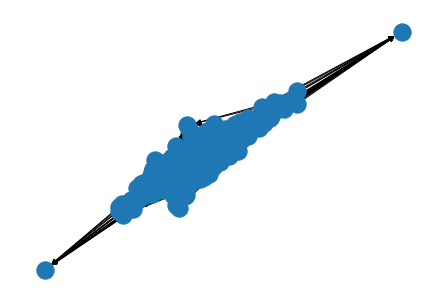

In [ ]:
import matplotlib.pyplot as plt 
#nx.draw(G, node_size=40,font_size=6) 
nx.draw_spring(G)
plt.show() 

In [ ]:
win_matrix[56]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
T = [1 for x in range(358)]
h = 0.01

In [ ]:
def compute_ncaa_partial(t):
  partial = 0
  for i in range(358):
    if i != t:
      #print(T[i] + T[t], T[t], T[i])
      partial += (T[i] / (T[i] + T[t])) * (win_matrix[t][i] / T[t] - win_matrix[i][t] / T[i])

  return partial

In [ ]:
new_T = [1 for x in range(358)]

for iterations in range(1000):  
  for i in range(358):
    partial = compute_ncaa_partial(i)
    new_T[i] = ((T[i] + h * np.sign(partial)) / sum(T)) * 358
  T = new_T

In [ ]:
teams = pd.read_csv('/content/drive/MyDrive/SportsRankingsData/teams.csv')
teams['Ranking'] = T
teams = teams.sort_values('Ranking', ascending=False)

final_rankings = pd.DataFrame()
final_rankings['Ranking'] = [x for x in range(1, 26)]
final_rankings['Maximum Likelihood'] = list(teams['Team Name'][0:25])

In [ ]:
coaches_rankings = pd.read_csv('/content/drive/MyDrive/SportsRankingsData/Coaches_Rankings - Coaches_Rankings.csv').head(25)

In [ ]:
# k = 25

correct_predictions = 0

for team in coaches_rankings['TEAM']:
  if (' ' + team) in list(teams['Team Name'][0:25]):
    correct_predictions += 1

accuracy =  correct_predictions / 25
accuracy

0.84

# NCAA Markov Chains

In [ ]:
p=1
rankings = np.array([1 for x in range(358)])

In [ ]:
win_matrix_n = np.zeros((358, 358))
for x in range(len(ncaa_data['Win Team'])):
  win_matrix_n[ncaa_data['Win Team'][x] - 1][ncaa_data['Lose Team'][x] - 1] = win_matrix_n[ncaa_data['Win Team'][x] - 1][ncaa_data['Lose Team'][x] - 1] + 1

In [ ]:
win_matrix_n[1, :]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
# transition_matrix = np.zeros((358, 358))
# W_n = win_matrix_n.copy()
# L_n = np.transpose(W_n)
# print(W_n[:, 1])
# for i in range(358):
#   p = 1
#   games_won = sum(win_matrix_n[i, :])
#   games_lost = sum(win_matrix_n[:, i])
#   games_played = games_won + games_lost
#   W_n[:, i] = (W_n[:, i]/games_played)*p
#   L_n[:, i] = (L_n[:, i]/games_played)*(1-p)
#   transition_matrix[i, i] = ((games_won/games_played)*(p))+((games_lost/games_played)*(1-p))
# transition_matrix = transition_matrix + W_n + L_n
# #transition_matrix.sum(axis=0)
# W_n[:, 1]

In [ ]:
transition_matrix = np.zeros((358, 358))

for i in range(358):
  transition_matrix[:, i] = win_matrix_n[:, i] / (sum(win_matrix_n[:, i]) + sum(win_matrix_n[i, :]))
  transition_matrix[i, i] = 1 - sum(transition_matrix[:, i])
transition_matrix.sum(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
converged_transition_matrix = np.linalg.matrix_power(transition_matrix, 100)
rankings = np.matmul(converged_transition_matrix, rankings)

In [ ]:
teams = pd.read_csv('/content/drive/MyDrive/SportsRankingsData/teams.csv')
teams['Ranking'] = rankings
teams = teams.sort_values('Ranking', ascending=False)
final_rankings['Markov Chain'] = list(teams['Team Name'][0:25])

In [ ]:
# k = 25

correct_predictions = 0

for team in coaches_rankings['TEAM']:
  #print(team, list(teams['Team Name'][0:25]))
  if (' ' + team) in list(teams['Team Name'][0:25]):
    #print('Testing')
    correct_predictions += 1

accuracy =  correct_predictions / 25
accuracy

0.76

In [ ]:
final_rankings['Coaches'] = coaches_rankings['TEAM']
final_rankings

,Ranking,Maximum Likelihood,Markov Chain,Coaches
0,1,Providence,Kansas,Gonzaga
1,2,Arizona,Duke,Arizona
2,3,Gonzaga,Baylor,Baylor
3,4,Houston,Arizona,Auburn
4,5,Villanova,Villanova,Kentucky
5,6,Duke,Texas_Tech,Kansas
6,7,Auburn,Tennessee,Duke
7,8,Kansas,Purdue,Villanova
8,9,Tennessee,Gonzaga,Purdue
9,10,Baylor,Providence,Providence


# **Data Source:**

https://masseyratings.com/scores.php?s=379387&sub=11590&all=1&mode=2&sch=on&format=1

https://www.espn.com/mens-college-basketball/rankings/_/week/18/year/2022/seasontype/2